In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import metric_functions as mf

In [2]:
baltimore = pd.read_csv('data/prepped/baltimore_race.csv')
charleston = pd.read_csv('data/prepped/charleston_race.csv')
chicago = pd.read_csv('data/prepped/chicago_race.csv')
columbus = pd.read_csv('data/prepped/columbus_race.csv')
dayton = pd.read_csv('data/prepped/dayton_race.csv')
denver = pd.read_csv('data/prepped/denver_race.csv')
kc = pd.read_csv('data/prepped/kc_race.csv')
memphis = pd.read_csv('data/prepped/memphis_race.csv')
milwaukee = pd.read_csv('data/prepped/milwaukee_race.csv')
ok_city = pd.read_csv('data/prepped/ok_city_race.csv')
pittsburgh = pd.read_csv('data/prepped/pittsburgh_race.csv')
st_louis = pd.read_csv('data/prepped/st_louis_race.csv')
syracuse = pd.read_csv('data/prepped/syracuse_race.csv')
wichita = pd.read_csv('data/prepped/wichita_race.csv')


In [3]:
baltimore['city'] = 'baltimore'
charleston['city'] = 'charleston'
chicago['city'] = 'chicago'
columbus['city'] = 'columbus'
dayton['city'] = 'dayton'
denver['city'] = 'denver'
kc['city'] = 'kc'
memphis['city'] = 'memphis'
milwaukee['city'] = 'milwaukee'
ok_city['city'] = 'ok_city'
pittsburgh['city'] = 'pittsburgh'
st_louis['city'] = 'st_louis'
syracuse['city'] = 'syracuse'
wichita['city'] = 'wichita'

In [4]:
all_city = pd.concat([baltimore, charleston, chicago, columbus, dayton, denver, kc, memphis, milwaukee, ok_city, pittsburgh, st_louis, syracuse, wichita], ignore_index = True)
all_city.head()

,GEOID,GEO.display.label,total_pop,pop_white,pop_not_white,pct_white,pct_not_white,city
0,24510010100,"Census Tract 101, Baltimore city, Maryland",1378,1276,102,0.925980,0.074020,baltimore
1,24510010200,"Census Tract 102, Baltimore city, Maryland",1262,1082,180,0.857369,0.142631,baltimore
2,24510010300,"Census Tract 103, Baltimore city, Maryland",965,847,118,0.877720,0.122280,baltimore
3,24510010400,"Census Tract 104, Baltimore city, Maryland",1196,1146,50,0.958194,0.041806,baltimore
4,24510010500,"Census Tract 105, Baltimore city, Maryland",951,759,192,0.798107,0.201893,baltimore


In [5]:
# all_city[all_city.city == 'charleston']
# list(all_city.groupby('city').groups)
# for i in list(all_city.groupby('city').groups.keys()):
#     print(i)
# #     print(all_city[all_city.city == i].total_pop)
#     print(list(all_city[all_city.city == i].index))
# # all_city.groupby('city').get_group('charleston')
# analysis = pd.DataFrame(columns = ['city', 'dissimilarity', 'interaction', 'isolation'])
# cityName = pd.Series(['baltimore', 'charleston', 'chicago', 'columbus', 'dayton', 'denver', 'kc', 'memphis','milwaukee', 'ok_city', 'pittsburgh', 'st_louis', 'syracusue', 'wichita'])

In [16]:
dissimilarity = mf.dissimilarity(all_city)
interaction = mf.interaction(all_city)
isolation = mf.isolation(all_city)
new_segregation = mf.newSeg(all_city)
all_analysis = pd.DataFrame({
    'city': list(all_city.groupby('city').groups.keys()),
    'dissimilarity': dissimilarity,
    'interaction': interaction,
    'isolation': isolation,
    'new_segregation': new_segregation
})


In [17]:
all_analysis = all_analysis.sort_values(['dissimilarity'], ascending=[True])
all_analysis.reset_index(drop=True)


,city,dissimilarity,interaction,isolation,new_segregation
0,ok_city,0.321733,0.613472,0.386528,0.773056
1,denver,0.356283,0.685280,0.314720,0.629440
2,wichita,0.412259,0.639562,0.360438,0.720875
3,charleston,0.416165,0.518106,0.481894,0.963789
4,columbus,0.429214,0.537027,0.462973,0.925946
5,kc,0.449827,0.580669,0.419331,0.838661
6,chicago,0.517389,0.336215,0.663785,1.327569
7,dayton,0.521216,0.507270,0.492730,0.985460
8,pittsburgh,0.522873,0.602966,0.397034,0.794069
9,syracuse,0.538142,0.606171,0.393829,0.787658


Text(0.5, 1.0, 'dissimilarity by city')

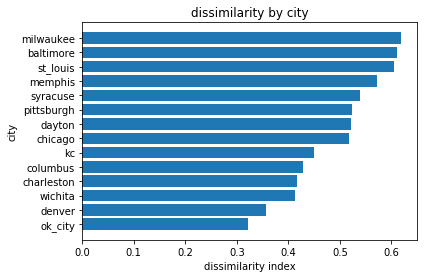

In [18]:
plt.barh(all_analysis.city, all_analysis.dissimilarity)
plt.xlabel('dissimilarity index')
plt.ylabel('city')
plt.title('dissimilarity by city')


In [19]:
all_analysis = all_analysis.sort_values(['interaction'], ascending=[False])
all_analysis.reset_index(drop=True)

,city,dissimilarity,interaction,isolation,new_segregation
0,denver,0.356283,0.685280,0.314720,0.629440
1,wichita,0.412259,0.639562,0.360438,0.720875
2,ok_city,0.321733,0.613472,0.386528,0.773056
3,syracuse,0.538142,0.606171,0.393829,0.787658
4,pittsburgh,0.522873,0.602966,0.397034,0.794069
5,kc,0.449827,0.580669,0.419331,0.838661
6,columbus,0.429214,0.537027,0.462973,0.925946
7,charleston,0.416165,0.518106,0.481894,0.963789
8,dayton,0.521216,0.507270,0.492730,0.985460
9,memphis,0.571606,0.481195,0.518805,1.037609


Text(0.5, 1.0, 'interaction by city')

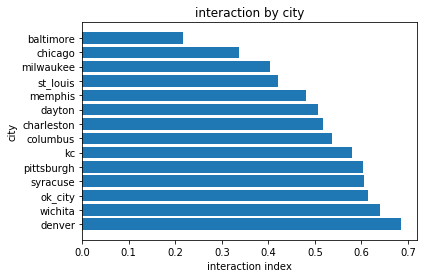

In [20]:
plt.barh(all_analysis.city, all_analysis.interaction)
plt.xlabel('interaction index')
plt.ylabel('city')
plt.title('interaction by city')



Text(0.5, 1.0, 'isolation by city')

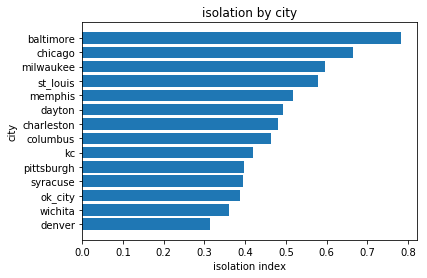

In [21]:
plt.barh(all_analysis.city, all_analysis.isolation)
plt.xlabel('isolation index')
plt.ylabel('city')
plt.title('isolation by city')


Text(0, 0.5, 'index')

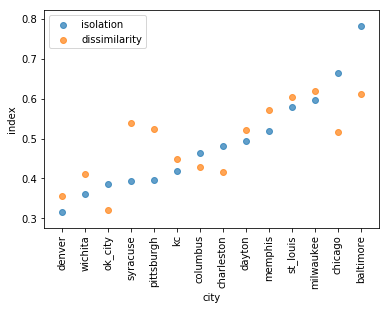

In [22]:
plt.scatter(all_analysis.city, all_analysis.isolation, alpha = 0.7, label = 'isolation')
plt.scatter(all_analysis.city, all_analysis.dissimilarity, alpha = 0.7, label = 'dissimilarity')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('index')


Text(0, 0.5, 'index')

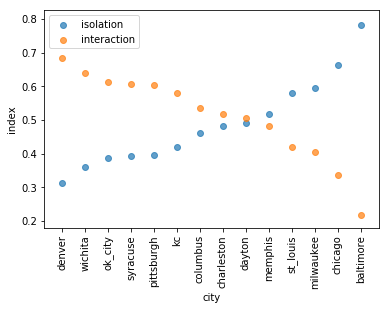

In [23]:
plt.scatter(all_analysis.city, all_analysis.isolation, alpha = 0.7, label = 'isolation')
plt.scatter(all_analysis.city, all_analysis.interaction, alpha = 0.7, label = 'interaction')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('index')

In [25]:
all_analysis = all_analysis.sort_values(['new_segregation'], ascending=[True])
all_analysis.reset_index(drop=True)

,city,dissimilarity,interaction,isolation,new_segregation
0,denver,0.356283,0.685280,0.314720,0.629440
1,wichita,0.412259,0.639562,0.360438,0.720875
2,ok_city,0.321733,0.613472,0.386528,0.773056
3,syracuse,0.538142,0.606171,0.393829,0.787658
4,pittsburgh,0.522873,0.602966,0.397034,0.794069
5,kc,0.449827,0.580669,0.419331,0.838661
6,columbus,0.429214,0.537027,0.462973,0.925946
7,charleston,0.416165,0.518106,0.481894,0.963789
8,dayton,0.521216,0.507270,0.492730,0.985460
9,memphis,0.571606,0.481195,0.518805,1.037609


Text(0, 0.5, 'index')

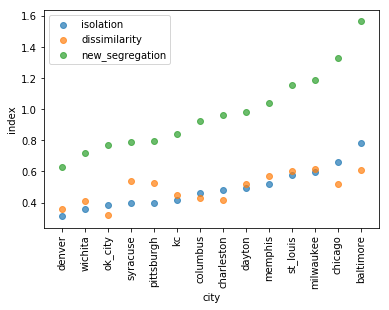

In [26]:
plt.scatter(all_analysis.city, all_analysis.isolation, alpha = 0.7, label = 'isolation')
plt.scatter(all_analysis.city, all_analysis.dissimilarity, alpha = 0.7, label = 'dissimilarity')
plt.scatter(all_analysis.city, all_analysis.new_segregation, alpha = 0.7, label = 'new_segregation')
plt.legend()
plt.xticks(rotation=90)
plt.xlabel('city')
plt.ylabel('index')